In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import rubin_sim.maf as maf
from rubin_sim.maf import radar

In [2]:
def norm_df(
    df,
    runs,
    cols,
    norm_run="baseline",
    invert_cols=None,
    reverse_cols=None,
    run_label="run_name",
    mag_cols=[],
):
    """
    Normalize values in a dataframe to a given run
    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame
    runs : list of str
        A list of run numes
    cols : list of str
        A list of columns in df to use
    norm_run : str
        The row to use to normalize things to
    invert_cols : list of str
        A list of column names that should be inverted (e.g., columns that
        are uncertainties and are better with a smaller value)
    reverse_cols : list of str
        Columns to reverse (e.g., magnitudes)
    run_label : str (run_name)
        The column that has run names
    mag_cols : list of str
        Columns that are in magnitudes
    """
    indices = [np.max(np.where(df.index == name)[0]) for name in runs]
    out_df = df[cols].iloc[indices].copy()
    if reverse_cols is not None:
        for colname in reverse_cols:
            out_df[colname] = -out_df[colname]
    if invert_cols is not None:
        for colname in invert_cols:
            out_df[colname] = 1.0 / out_df[colname]
    if norm_run is not None:
        indx = np.max(np.where(out_df.index == norm_run)[0])
        for col in out_df.columns:
            # maybe just check that it's not a
            if col != "run_name":
                if (col in mag_cols) | (mag_cols == "all"):
                    out_df[col] = 1.0 + (out_df[col] - out_df[col].iloc[indx])
                else:
                    out_df[col] = (
                        1.0
                        + (out_df[col] - out_df[col].iloc[indx])
                        / out_df[col].iloc[indx]
                    )
    return out_df

In [6]:
data_loaded = pd.read_hdf('summary.h5')

In [13]:
[col for col in data_loaded.columns if 'DDF' in col]

['Nvisits DDF Count',
 'Nvisits DDF Identity',
 'Nvisits DDF Max',
 'Nvisits DDF Mean',
 'Nvisits DDF Median',
 'Nvisits DDF Min',
 'Nvisits DDF N(+3Sigma)',
 'Nvisits DDF N(-3Sigma)',
 'Nvisits DDF Rms',
 'SNNSNMetric DD:COSMOS_nSN DD:COSMOS all bands, only DDF observations Mean',
 'SNNSNMetric DD:COSMOS_nSN DD:COSMOS all bands, only DDF observations Median',
 'SNNSNMetric DD:COSMOS_nSN DD:COSMOS all bands, only DDF observations Sum',
 'SNNSNMetric DD:COSMOS_zlim DD:COSMOS all bands, only DDF observations Mean',
 'SNNSNMetric DD:COSMOS_zlim DD:COSMOS all bands, only DDF observations Median',
 'SNNSNMetric DD:COSMOS_zlim DD:COSMOS all bands, only DDF observations Sum',
 'SNNSNMetric DD:ECDFS_nSN DD:ECDFS all bands, only DDF observations Mean',
 'SNNSNMetric DD:ECDFS_nSN DD:ECDFS all bands, only DDF observations Median',
 'SNNSNMetric DD:ECDFS_nSN DD:ECDFS all bands, only DDF observations Sum',
 'SNNSNMetric DD:ECDFS_zlim DD:ECDFS all bands, only DDF observations Mean',
 'SNNSNMetric DD

In [15]:
name_dict = {'parallax  best18k': 'parallax best 18k',
            'properMotion  best18k': 'proper motion best 18k',
            'MicrolensingMetric_detect tE 5_10 days Fraction detected of total (mean)': '5-10d microlensing\ndetection',
            'MicrolensingMetric_detect tE 60_90 days Fraction detected of total (mean)': '60-90d microlensing\ndetection',
            'fO  fONv MedianNvis': 'fO N vis',
            'SNNSNMetric_nSN DDF excluded Total detected': 'SNe, N',
             'SNNSNMetric_zlim DDF excluded Median': 'SNe, zlim',
            #'Total detected TDE_Quality__some_color_pnum  UserPointsSlicer': 'TDE',
            'ExgalM5_with_cuts i band non-DD year 10 3x2ptFoM': '3x2 i-band',
            'WeakLensingNvisits gri band non-DD Median': 'WL Nvis i-band',
            'PrestoKNe__scoreS  Sum': 'KNe Presto S',
            'XRBPopMetric__early_detect  Total detected': 'XRB\nearly detect',
            'Brown Dwarf, L7  VolumeSum': 'Brown Dwarf Vol',
            'Discovery_N_Chances NEO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 16.000000': 'NEO bright',
            'Discovery_N_Chances NEO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 22.000000': 'NEO faint',
            'Discovery_N_Chances TNO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 6.000000': 'TNO'}
invert_cols = ['parallax best 18k', 'proper motion best 18k']
mag_cols = ['5-10d microlensing\ndetection', '60-90d microlensing\ndetection', 'NEO bright', 'NEO faint', 'TNO']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = data_loaded[key]

In [16]:
data

,parallax best 18k,proper motion best 18k,5-10d microlensing\ndetection,60-90d microlensing\ndetection,fO N vis,"SNe, N","SNe, zlim",3x2 i-band,WL Nvis i-band,KNe Presto S,XRB\nearly detect,Brown Dwarf Vol,NEO bright,NEO faint,TNO
clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_uz_cloudso0_v2.99_10yrs,0.805571,0.184885,0.1666,0.4576,799.0,110495.339198,0.295627,38.225059,425.0,210.0,1962.0,166934.375963,0.9336,0.646730,0.722401
weather_uz_cloudso10_v2.99_10yrs,0.783929,0.184231,0.1723,0.4341,847.0,113053.834624,0.289441,38.911089,451.0,192.0,2020.0,164936.876322,0.9428,0.654324,0.723197
weather_uz_cloudso11_v2.99_10yrs,0.780488,0.183146,0.1645,0.4244,848.0,113409.411616,0.289941,38.731766,451.0,222.0,2006.0,164360.029335,0.9436,0.653338,0.719353
weather_uz_cloudso1_v2.99_10yrs,0.800869,0.186948,0.1574,0.4505,797.0,113454.359720,0.301566,38.664933,425.0,199.0,1976.0,167104.502799,0.9306,0.642122,0.722877
weather_uz_cloudso20_v2.99_10yrs,0.790215,0.188006,0.1625,0.4346,849.0,111680.582280,0.289251,38.696802,452.0,210.0,2015.0,164376.275882,0.9408,0.650066,0.718669
weather_uz_cloudso21_v2.99_10yrs,0.788149,0.185168,0.1704,0.4319,850.0,109129.824717,0.287501,38.846247,452.0,197.0,2015.0,162159.490771,0.9400,0.650808,0.718417
weather_uz_cloudso30_v2.99_10yrs,0.795926,0.186255,0.1607,0.4157,828.0,108484.661263,0.291436,38.708848,441.0,196.0,1925.0,162016.647164,0.9406,0.651293,0.721997
weather_uz_cloudso31_v2.99_10yrs,0.789193,0.186356,0.1603,0.4162,837.0,108292.222265,0.288952,38.402932,445.0,244.0,1959.0,163719.014675,0.9398,0.650007,0.719977
weather_uz_cloudso35_v2.99_10yrs,0.785774,0.187352,0.1615,0.4272,830.0,112720.115389,0.291725,38.291363,442.0,200.0,1995.0,163283.266242,0.9400,0.649278,0.718647


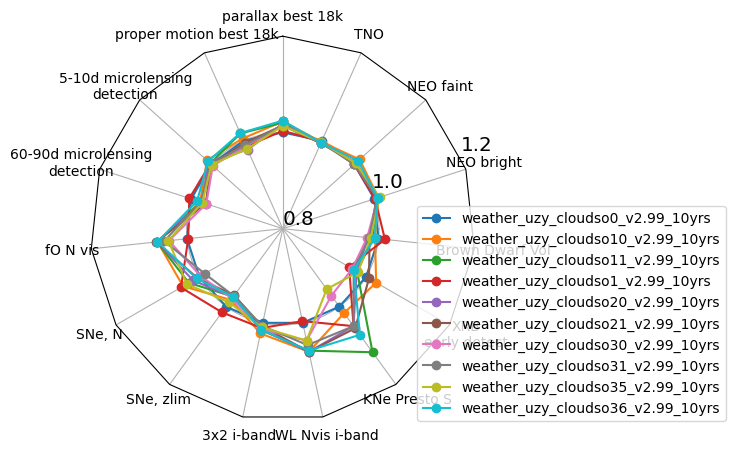

In [22]:
runs = [run for run in data.index if 'uzy' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, mag_cols = mag_cols, norm_run='weather_uzy_cloudso0_v2.99_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

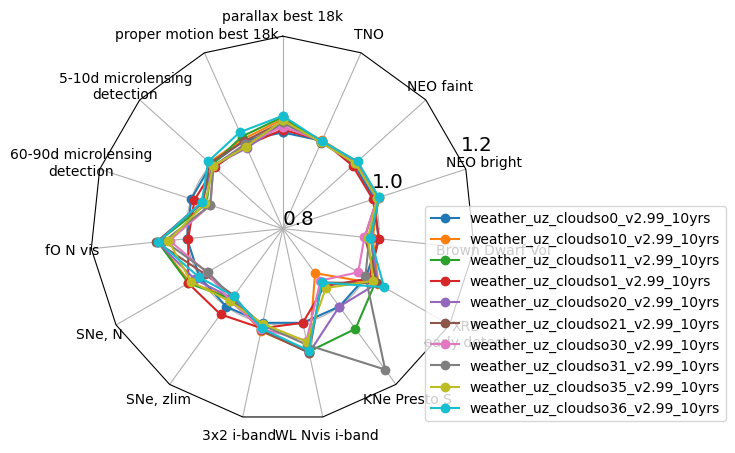

In [23]:
runs = [run for run in data.index if 'uz_' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, mag_cols = mag_cols, norm_run='weather_uz_cloudso0_v2.99_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

In [18]:
data_loaded.columns

Index(['20thPercentile Inter-Night Gap All sky all bands Count',
       '20thPercentile Inter-Night Gap All sky all bands Max',
       '20thPercentile Inter-Night Gap All sky all bands Mean',
       '20thPercentile Inter-Night Gap All sky all bands Median',
       '20thPercentile Inter-Night Gap All sky all bands Min',
       '20thPercentile Inter-Night Gap All sky all bands N(+3Sigma)',
       '20thPercentile Inter-Night Gap All sky all bands N(-3Sigma)',
       '20thPercentile Inter-Night Gap All sky all bands Rms',
       '20thPercentile Inter-Night Gap All sky g band Count',
       '20thPercentile Inter-Night Gap All sky g band Max',
       ...
       'properMotion  90th%ile', 'properMotion  best18k', 'tEff  Identity',
       'tEff g Identity', 'tEff i Identity', 'tEff r Identity',
       'tEff u Identity', 'tEff y Identity', 'tEff z Identity',
       'young_stars  Sum'],
      dtype='object', length=49627)

/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_19940/2418159859.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _temp = ax.set_xticklabels(data.index[good],rotation=90)


Text(0, 0.5, 'SNe zlim (No DDF)')

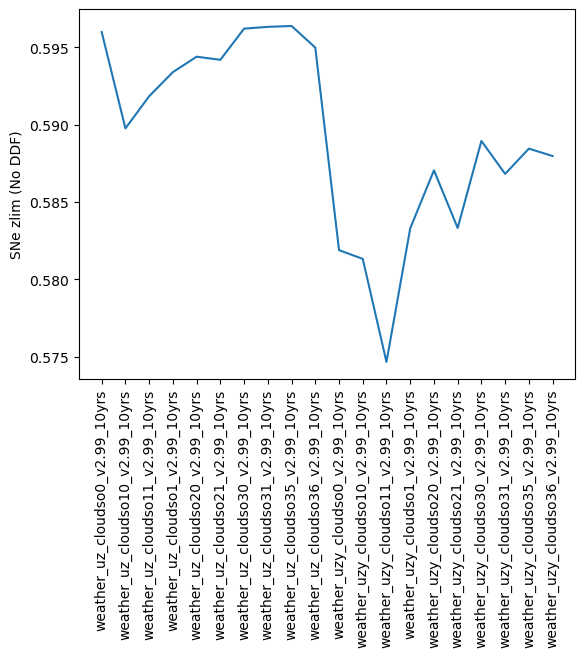

In [25]:
col_name = 'SNNSNMetric DD:COSMOS_zlim DD:COSMOS all bands, only DDF observations Median'
fig, ax = plt.subplots()
good = np.where(data_loaded[col_name] > 0)
ax.plot(data_loaded[col_name].iloc[good])
_temp = ax.set_xticklabels(data.index[good],rotation=90)
ax.set_ylabel('SNe zlim (No DDF)')

/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_19940/3549406293.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _temp = ax.set_xticklabels(data.index[good],rotation=90)


Text(0, 0.5, 'Nvisits DDF Count')

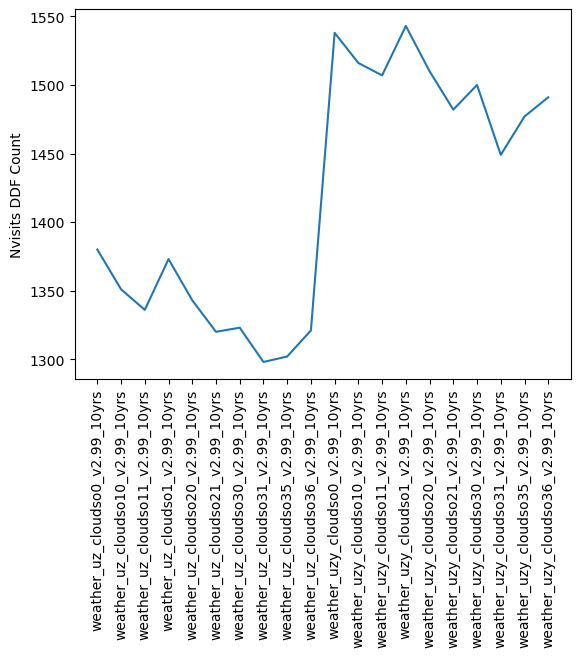

In [26]:
col_name = 'Nvisits DDF Count'
fig, ax = plt.subplots()
good = np.where(data_loaded[col_name] > 0)
ax.plot(data_loaded[col_name].iloc[good])
_temp = ax.set_xticklabels(data.index[good],rotation=90)
ax.set_ylabel(col_name)

/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_19940/434271458.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _temp = ax.set_xticklabels(data.index[good],rotation=90)


Text(0, 0.5, 'SNNSNMetric_nSN DDF excluded Total detected')

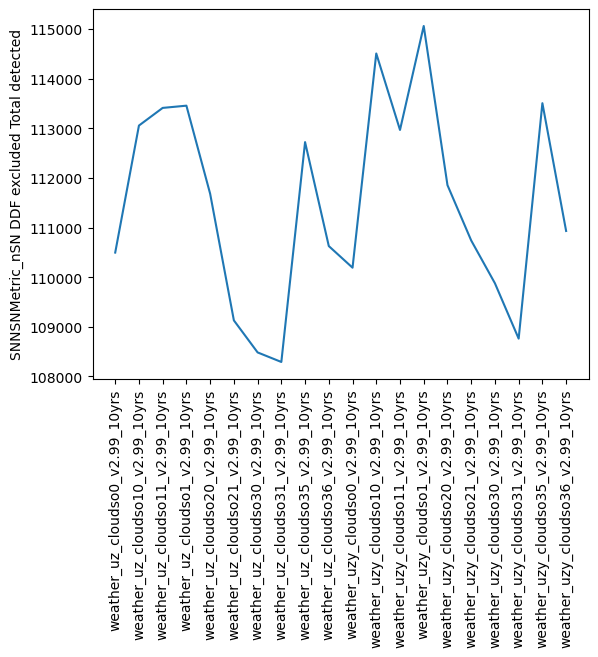

In [27]:
col_name = 'SNNSNMetric_nSN DDF excluded Total detected'
fig, ax = plt.subplots()
good = np.where(data_loaded[col_name] > 0)
ax.plot(data_loaded[col_name].iloc[good])
_temp = ax.set_xticklabels(data.index[good],rotation=90)
ax.set_ylabel(col_name)

/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_19940/2366408726.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _temp = ax.set_xticklabels(data.index[good],rotation=90)


Text(0, 0.5, 'Parallax Uncert @ 24.0  Median')

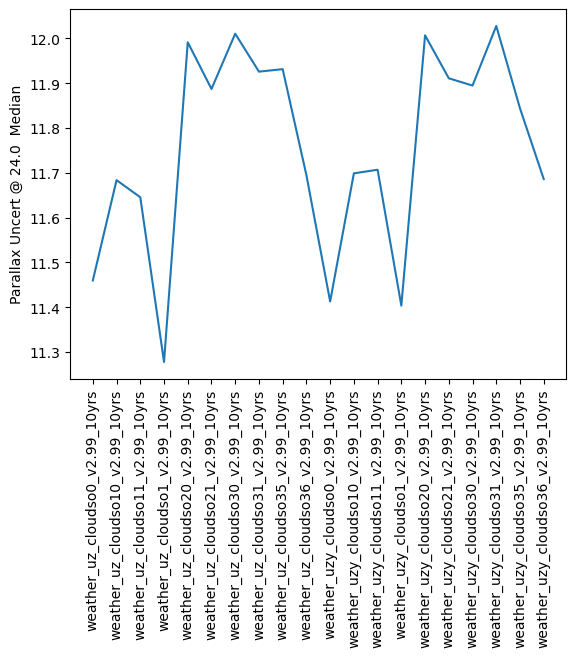

In [28]:
col_name = 'Parallax Uncert @ 24.0  Median'
fig, ax = plt.subplots()
good = np.where(data_loaded[col_name] > 0)
ax.plot(data_loaded[col_name].iloc[good])
_temp = ax.set_xticklabels(data.index[good],rotation=90)
ax.set_ylabel(col_name)

/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_19940/2846681267.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _temp = ax.set_xticklabels(data.index[good],rotation=90)


Text(0, 0.5, 'KNe Presto S')

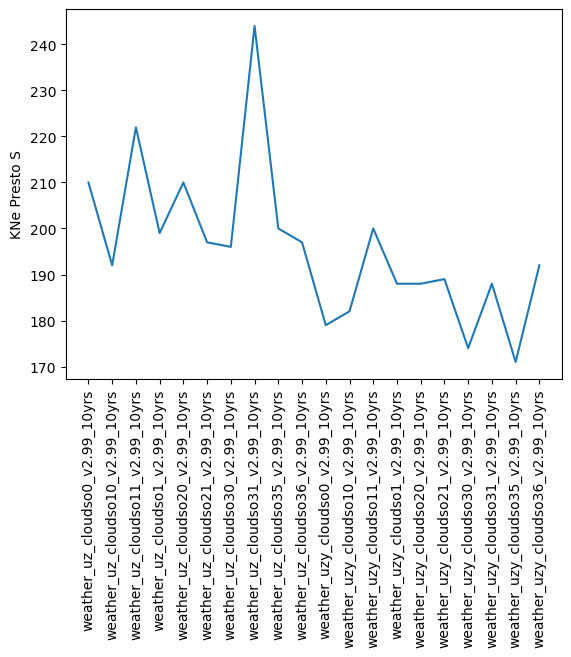

In [29]:
col_name = 'KNe Presto S'
fig, ax = plt.subplots()
good = np.where(data[col_name] > 0)
ax.plot(data[col_name].iloc[good])
_temp = ax.set_xticklabels(data.index[good],rotation=90)
ax.set_ylabel(col_name)